# Prediksi Diabetes Menggunakan Artificial Neural Network

## Library yang digunakan

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,accuracy_score

## Data Set yang digunakan

In [26]:
df = pd.read_csv('diabetes.csv')

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

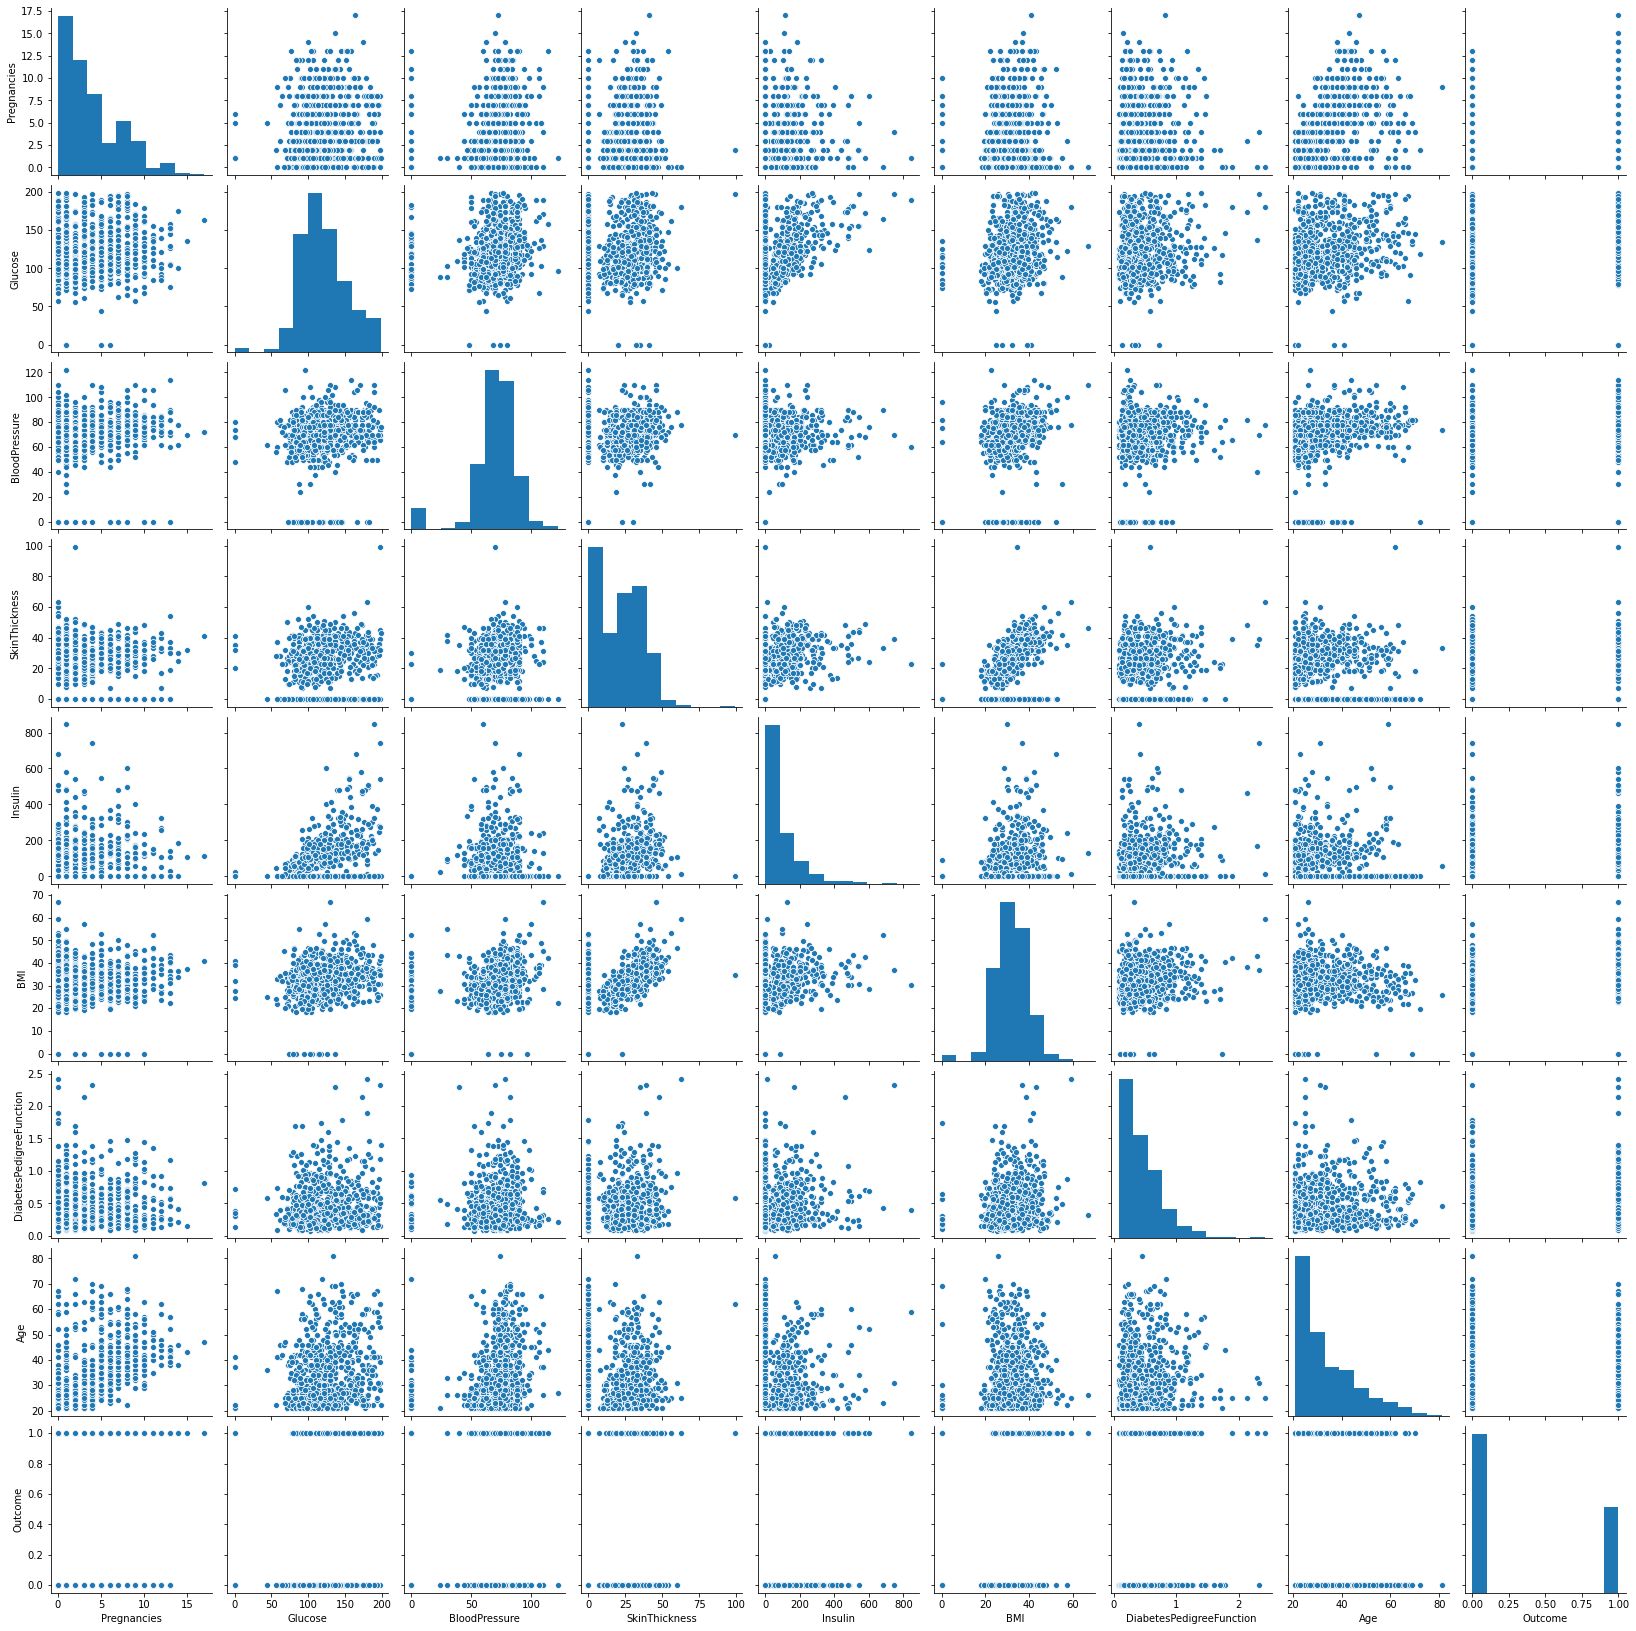

In [29]:
sns.pairplot(df)

<AxesSubplot:>

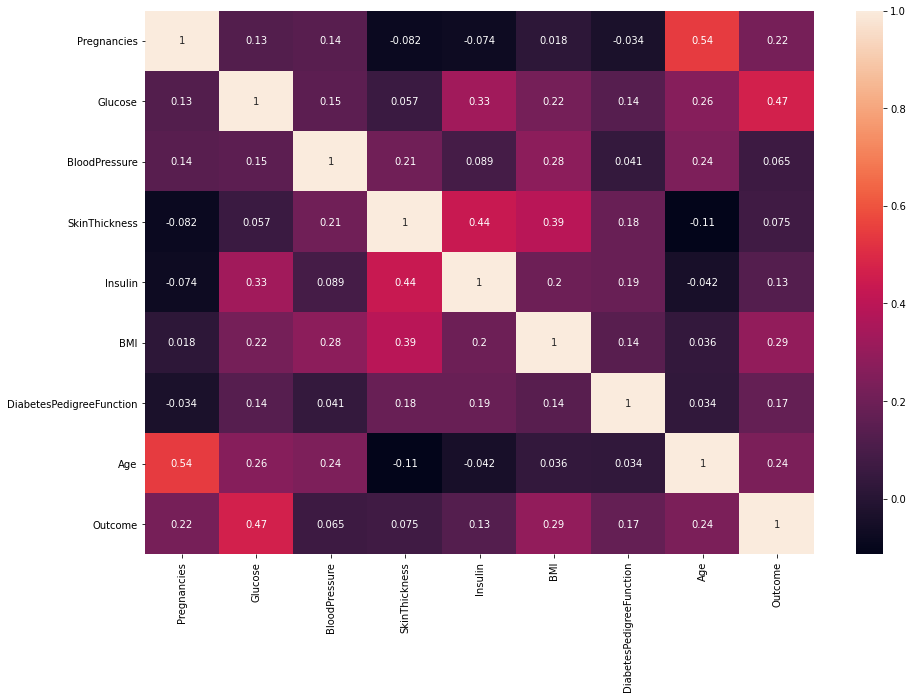

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

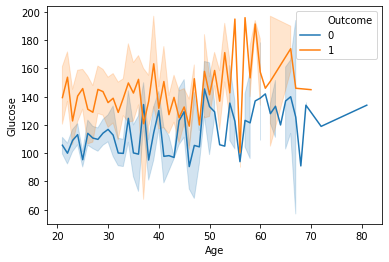

In [31]:
sns.lineplot(x='Age',y='Glucose',hue='Outcome',data=df)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

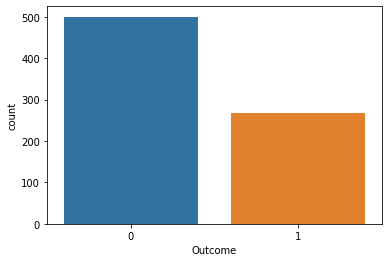

In [32]:
sns.countplot(x='Outcome',data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

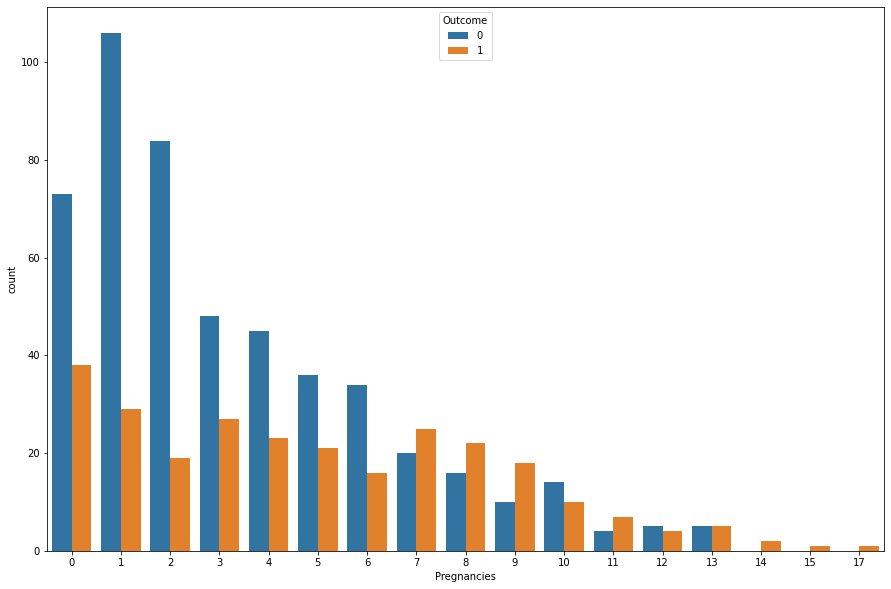

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x='Pregnancies',hue='Outcome',data=df)

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

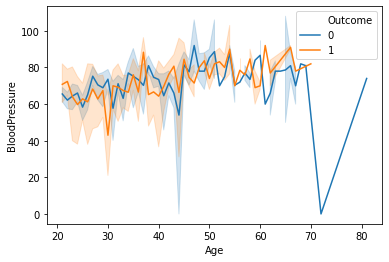

In [34]:
sns.lineplot(x='Age',y='BloodPressure',hue='Outcome',data=df)

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

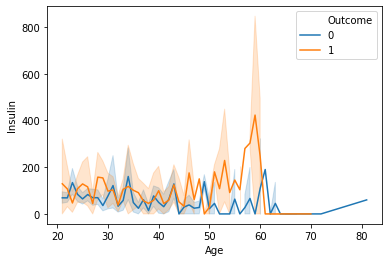

In [35]:
sns.lineplot(x='Age',y='Insulin',hue='Outcome',data=df)

In [48]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
ann = tf.keras.Sequential()

In [40]:
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [41]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
ann.fit(X_train,y_train,batch_size=12,epochs=100)

Train on 614 samples
Epoch 1/100
614/614 [==============================] - 0s 416us/sample - loss: 0.6491 - accuracy: 0.6515
Epoch 2/100
614/614 [==============================] - 0s 68us/sample - loss: 0.5963 - accuracy: 0.6450
Epoch 3/100
614/614 [==============================] - 0s 70us/sample - loss: 0.5546 - accuracy: 0.6775
Epoch 4/100
614/614 [==============================] - 0s 76us/sample - loss: 0.5258 - accuracy: 0.7182
Epoch 5/100
614/614 [==============================] - 0s 73us/sample - loss: 0.5078 - accuracy: 0.7264
Epoch 6/100
614/614 [==============================] - 0s 80us/sample - loss: 0.4951 - accuracy: 0.7362
Epoch 7/100
614/614 [==============================] - 0s 78us/sample - loss: 0.4878 - accuracy: 0.7476
Epoch 8/100
614/614 [==============================] - 0s 75us/sample - loss: 0.4810 - accuracy: 0.7410
Epoch 9/100
614/614 [==============================] - 0s 78us/sample - loss: 0.4754 - accuracy: 0.7476
Epoch 10/100
614/614 [====================

614/614 [==============================] - 0s 76us/sample - loss: 0.3469 - accuracy: 0.8371
Epoch 79/100
614/614 [==============================] - 0s 80us/sample - loss: 0.3476 - accuracy: 0.8502
Epoch 80/100
614/614 [==============================] - 0s 80us/sample - loss: 0.3466 - accuracy: 0.8469
Epoch 81/100
614/614 [==============================] - 0s 81us/sample - loss: 0.3473 - accuracy: 0.8469
Epoch 82/100
614/614 [==============================] - 0s 76us/sample - loss: 0.3439 - accuracy: 0.8518
Epoch 83/100
614/614 [==============================] - 0s 81us/sample - loss: 0.3443 - accuracy: 0.8502
Epoch 84/100
614/614 [==============================] - 0s 84us/sample - loss: 0.3441 - accuracy: 0.8453
Epoch 85/100
614/614 [==============================] - 0s 84us/sample - loss: 0.3424 - accuracy: 0.8436
Epoch 86/100
614/614 [==============================] - 0s 76us/sample - loss: 0.3407 - accuracy: 0.8436
Epoch 87/100
614/614 [==============================] - 0s 78us/samp

In [43]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.75)

In [44]:
for i in range(len(y_pred)):
    print("Predicted %d------> Expected %d" %(y_pred[[i]],y_test[i]))

Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 1
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 0
Predicted 

In [45]:
cm = confusion_matrix(y_pred,y_test)
acc = accuracy_score(y_pred,y_test)

In [46]:
cm

array([[101,  20],
       [ 13,  20]], dtype=int64)

In [47]:
acc

0.7857142857142857